# Fourth Goal: (Quality)
<b>Goal</b>: Know how to assess that the quality of a dataset.<p>
<b>Present</b>: I only know that the quality of data provided can differ significantly.<p>
<b>Measure </b>: At the end of the course, I want to provide a short literature review on aspects related to data quality and conduct a simple data quality assessment on a sample dataset.


## Introduction
In times of widespread use of ICT and digitalisation, a huge stream of data is created each day. The greatest challenge in the Big Data era therefore is not to obtain data, but to diffrentiate between relevant and irrelvant data, since only relevant data can enhance decision making processes. A way to identify relevant data is to assess the data quality of a given dataset (Ardagna et al, 2018). Data quality is generally defined as the *fitness for use* of data (Ardagna et al, 2018; Cai & Zhu, 2015), which can be understood as the usefulness of data to the user. <p>
In this notebook, the framework provided by Cai & Zhu (2015) is used to analyse an UN dataset about the goal attainment of indicator 13.1.1 *Number of people affected by disaster* of the sustainable development goals.


## About the framework
According to the framework proposed by Cai & Zhu (2015), data quality can be categorised in five dimensions:<p>
1. Availability, describing the easiness to obtain the data.<p>
2. Usability, describing the trustworthiness of the data.<p>
3. Reliability, delineating whether the data support meaningful analysis.<p>
4. Relevance, depicting the match between users needs and data content.<p>
5. Presentation Quality, describing whether the data is provided in an intelligible way.<p>
I will now use these five dimensions to qualitativley assess data quality of the chosen dataset.<br>
The following graph displays the framework as Cai & Zhu (2015) depict it in their paper in figure 2.

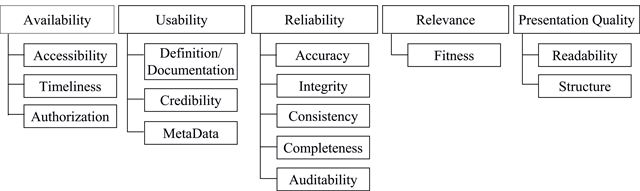

In [1]:
from IPython.display import Image, display
display(Image('https://datascience.codata.org/article/10.5334/dsj-2015-002/figures/Fig02_web.png'))

## About the dataset
The dataset of concern is provided by UN-Stats and includes data about the indicator 13.1.1	of sub-target 13.1 of SDG 13.
SDG 13 is labelled as 'Take urgent action to combat climate change and its impacts', with sub-target 13.1 describes the objective to 'Strengthen resilience and adaptive capacity to climate-related hazards and natural disasters in all countries'. Indicator 13.1.1 then measures 'Number of deaths, missing persons and persons affected by disaster per 100,000 people' (UN, UNStats - Metadata). The dataset in this notebook contains the series *VC_DSR_AFFCT*, one of several series that are used for calculating indicator 13.1.1. *VC_DSR_AFFCT* describes the number of people affected by disaster (UN, UNStats - Indicator Database).
<p>
Let's have an initial look at the data! <p>




In [2]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading dataframe
df = pd.read_csv('https://raw.githubusercontent.com/zyankarli/Data-for-individual-portfolio/main/VC_DSR_AFFCT.csv', sep = ';')

In [4]:
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Nature,Reporting Type,Units,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,1,1.5,1.5.1,VC_DSR_AFFCT,Number of people affected by disaster (number),4,Afghanistan,NaN,G,NUMBER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.5,1.5.1,VC_DSR_AFFCT,Number of people affected by disaster (number),8,Albania,NaN,G,NUMBER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1.5,1.5.1,VC_DSR_AFFCT,Number of people affected by disaster (number),24,Angola,NaN,G,NUMBER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1.5,1.5.1,VC_DSR_AFFCT,Number of people affected by disaster (number),28,Antigua and Barbuda,NaN,G,NUMBER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.5,1.5.1,VC_DSR_AFFCT,Number of people affected by disaster (number),32,Argentina,NaN,G,NUMBER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the following, the partial big data quality assessment framework delineated in table 1 of Cai & Zhu (2015) is used to assess the data quality of this dataset. The decision to focus on the partial data quality framework that does not include all elements for each data quality dimension is taken because these elements feature clearly described indicators.

## Availability
### Accessibility
Accessibility is guaranteed when the dataset is easy to access.
In this case, the data was freely available via the UNStats – SDG Indicators webpage. The webpage makes it very easy to query for a SDG of interest and to download a desired indicator dataset. It is not required to possess  an account to obtain the dataset. Moreover, the data is available in the format of a standard excel sheet, further lowering access barriers. I conclude that the dataset at hand is very accessible.
### Timeliness
Timeliness is concerned with the topicality of the given data, the times periods covered as well as the time it takes the user to receive presentable results.
Data is collected on a yearly basis from 2005 onwards. The dataset can be described as up-to-date because it includes recent numbers of the year of 2019. In addition, it is relatively easy to generate informative visualisations. However, it must be noted that the temporal coarseness, with a time step of one year, limits the possible applications of the dataset.<p>
Overall, it can be stated that the dataset exhibits a high level of availability.


Columns in dataset:  ['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription', 'GeoAreaCode', 'GeoAreaName', 'Nature', 'Reporting Type', 'Units', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


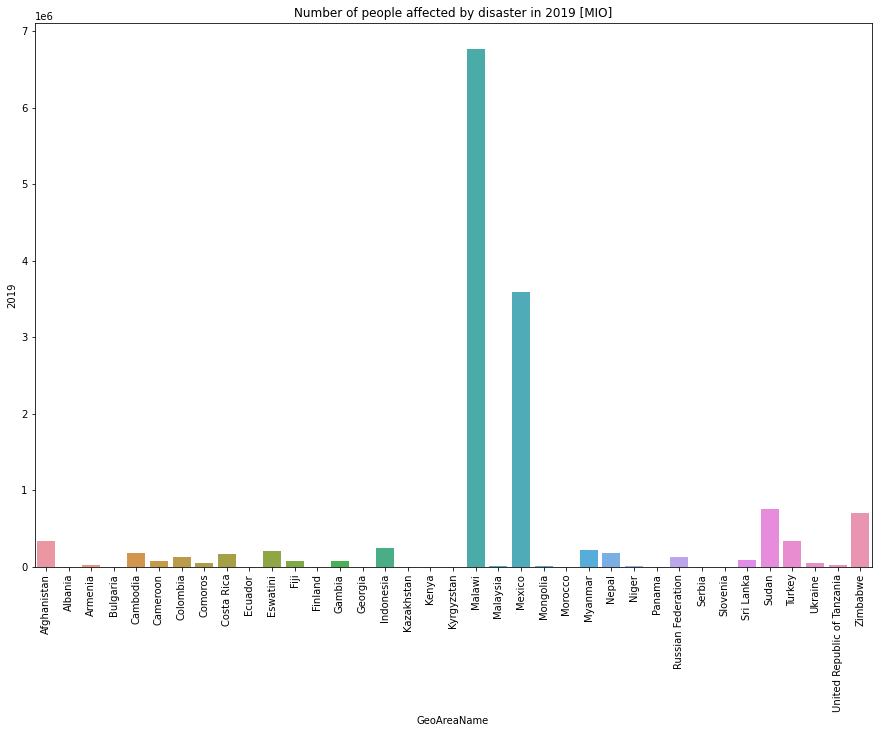

In [5]:
#TIMELINESS
#Drop unnamed columns that exist due to pandas read_csv function
mask = df.columns.str.contains('Unnamed')
df = df.loc[:, ~mask]
#Print years included in dataset
print('Columns in dataset: ',list(df.columns))

#Check whether fast plotting is possible
fig, ax = plt.subplots(1, figsize=(15, 10))
df_plot = df[['GeoAreaName', '2019']].dropna()
sns.barplot(x='GeoAreaName', y='2019', ax=ax, data=df_plot).set(title='Number of people affected by disaster in 2019 [MIO]')
ax.tick_params(axis="x", rotation=90)
plt.show()

## Usability
### Credibility
A dataset is credible when it is provided by a trustworthy organisation with recognised knowledge on the subject at hand and when metadata is well-prepared. In this case, the data is provided by UNStats, which is the official data platform of the United Nations, a globally recognised and trusted organisation. Moreover, the meta data is easily available under the following link: https://unstats.un.org/sdgs/metadata/files/Metadata-13-01-01.pdf.<br> I therefore conclude that the dataset features a high level usability.


## Reliability
### Accuracy
Datasets are referred to as accurate when the data it contains is a good representation of reality. The numbers in the database represent the number of people affected by disaster. The precision of the numbers is high, because they are specified in single unit digits (e.g. 476). However, it is not possible to validate the correctness of the given numbers. This is also mentioned in the metadata provided by UNstats, where it is noted that "In most cases international data sources only record events that surpass some threshold of impact and use secondary data sources which usually have non uniform or even inconsistent methodologies, producing heterogeneous datasets" (UN, Metadata 13.01.01, p.2). Furthermore, it remains unclear whether NaN-data represents zeros or missing data.<br>
Therefore, the numbers in the table must be taken with a pinch of salt.

### Consistency
Consistency of dataset is given when data is verifiable and when it can be processed without changing the underlying value domain. According to footnotes in the downloaded excel file, the numbers are a combination of national statistics provided via the Sendai Frame Monitoring System and estimations. Therefore, it might not be possible to re-generate the exact same numbers. Furthermore, some numbers are given with two decimal places, which is hard to interpret because each number is supposed to represent a number of people.

### Integrity
Following the framework of Cai & Zhu (2015), a dataset can accomplish integrity by featuring a clear and consistent data structure and by ensuring that data never experienced unauthorized modification. The dataset clearly features a consistent structure, including straight forward labelling of columns and all numbers stored as float. However, it is impossible to assess the probability of unauthorised access. While external manipulation of the data seems rather unlikely, active manipulation of numbers provided by states and their ministries can and should not be excluded. Single states might, paradoxically, profit by exhibiting high numbers of affected people, for example through easier access to international funds.

### Completeness
Completeness is concerned about the number and the impact of data deficiencies on the rest of the dataset. On the one hand, absence for numbers of one year does not impact the validity of numbers of other years. On the other hand, it must be noted that around 38% of all data is missing (NaN-values) and, as already mentioned, it is not clear whether these values are simply missing or whether they are meant to be understood as zero.
<p>
To sum up, the values in this dataset are likely to underestimate the number of people affected by disaster because national agencies are likely to restrict communication to greater events. The reliability of the dataset could be improved by lowering the number of NaN-values, albeit by only replacing them with zero.

In [6]:
#COMPLETENESS
print('Proportion of NaN-values in dataset: ', df.isnull().sum().sum() / df.notnull().sum().sum() )

Proportion of NaN-values in dataset:  0.37681159420289856


## Relevance
### Fitness
Fitness describes the fit between user’s needs and the data provided by the dataset. Therefore, the assessment of fitness is a subjective one, depending on the individual user’s needs. While the presented dataset, for example, fully satisfies my needs – by providing a general overview of affected people by natural disasters – it may not support in-depth research that strives for the establishment of causal links because of the amount of missing values or the coarseness of the data provided. However, I believe that it is unlikely that this dataset is outright useless for users, since it includes exactly the data which is described in the SGD indicators database. A drawback of this dataset is that all values exist threefoldly. This is because the series *VC_DSR_AFFCT* is also used for the calculation of indicators different from 13.1.1. It is not hard to reduce the dataset so that each value is only included ones. Nevertheless the data excess poses an unnecessary threat to potential miscalculations.


In [7]:
#FITNESS
print('Indicators included: ',df['Indicator'].unique())
#Show example of data excess
df[df['GeoAreaName'] == 'Austria']

Indicators included:  ['1.5.1' '11.5.1' '13.1.1']


,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Nature,Reporting Type,Units,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
7,1,1.5,1.5.1,VC_DSR_AFFCT,Number of people affected by disaster (number),40,Austria,NaN,G,NUMBER,...,65.0,57.0,58.0,583.0,30.0,196.0,60.0,271.0,6630.0,NaN
140,11,11.5,11.5.1,VC_DSR_AFFCT,Number of people affected by disaster (number),40,Austria,NaN,G,NUMBER,...,65.0,57.0,58.0,583.0,30.0,196.0,60.0,271.0,6630.0,NaN
273,13,13.1,13.1.1,VC_DSR_AFFCT,Number of people affected by disaster (number),40,Austria,NaN,G,NUMBER,...,65.0,57.0,58.0,583.0,30.0,196.0,60.0,271.0,6630.0,NaN


In [8]:
#Reduce dataframe to indicator of interest
df = df[df['Indicator'] == '13.1.1']
df.head(3)

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Nature,Reporting Type,Units,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
266,13,13.1,13.1.1,VC_DSR_AFFCT,Number of people affected by disaster (number),4,Afghanistan,NaN,G,NUMBER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29933.20000,283200.12,332536.23324
267,13,13.1,13.1.1,VC_DSR_AFFCT,Number of people affected by disaster (number),8,Albania,NaN,G,NUMBER,...,90495.12157,5341.90169,6665.61371,16150.40793,3914.13062,1500.08626,146.19031,752.85467,4683.00,517.84045
268,13,13.1,13.1.1,VC_DSR_AFFCT,Number of people affected by disaster (number),24,Angola,NaN,G,NUMBER,...,18715.00000,187508.00000,19814.00000,12111.00000,30701.00000,40634.00000,75290.00000,38797.00000,33176.00,NaN


## Presentation Quality
### Readability
A dataset is referred to as readable when the data is provided in a clear and understandable manner, when it is easy to understand the data description and when it is easy to judge whether the data meets the needs of the user. The dataset at hand features high readability, because it provides data in an aggregated and tabular form and meaningful column names. However, it must be noted that the interpretation of float numbers it is not entirely clear, since, as already pointed out, the numbers are meant to describe number of people.

In [9]:
#READABILITY
#Showcase difficulaties with number interpretation
print("The number of people in {} affected by natural disaster in 2012 is {}.".format(df.iloc[1]['GeoAreaName'],df.iloc[1]['2012']))

The number of people in Albania affected by natural disaster in 2012 is 6665.61371.


## Conclusion/Discussion
The framework by Cai & Zhu (2015) provides a holistic overview of the data quality of dataset. An advantage of the framework is the possibility to vary the detailedness of the analysis flexibly. Nevertheless, I believe it would be helpful to extend this purely qualitative analysis with quantitative indicators.
The data quality of the analysed dataset, the series VC_DSR_AFFCT of indicator 13.1.1 of SDG 13, fulfils the expectations of an official UN dataset. Nevertheless, the deficits worth mentioning are the unclear meaning of NaN-values as well as the excess of data.


## References
Ardagna, D., Cappiello, C., Samá, W., & Vitali, M. (2018). Context-aware data quality assessment for big data. Future Generation Computer Systems, 89, 548-562. <p>

Cai, L., & Zhu, Y. (2015). The challenges of data quality and data quality assessment in the big data era. Data science journal, 14.
https://datascience.codata.org/article/10.5334/dsj-2015-002/ <p>

UN.(n.d.). UNStats - Indicator Database. https://unstats.un.org/sdgs/indicators/database/, Accessed 26.04.2021 <p>
UN.(n.d.). UNStats - Metadata. https://unstats.un.org/sdgs/metadata/?Text=&Goal=13&Target=, Accessed 26.04.2021 <p>
UN.(n.d.). UNSTats - Metadata 13.01.01, accessible via  https://unstats.un.org/sdgs/metadata/files/Metadata-13-01-01.pdf